# Introduction

# Analysis preparation

## Import packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
from data_quality_stats import missing_data, most_frequent_values, unique_values
from plot_style_utils import set_color_map, plot_count, show_wordcloud

## Read data

In [3]:
coffee_df = pd.read_csv("/kaggle/input/store-locations/directory.csv")

## Check the data

Here we perform basic data quality checks, quickly glimpse the data.

In [4]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


Most of the values are not missing, there are total 25,600 rows.

In [5]:
coffee_df.describe()

Longitude      Latitude
count  25599.000000  25599.000000
mean     -27.872234     34.793016
std       96.844046     13.342332
min     -159.460000    -46.410000
25%     -104.665000     31.240000
50%      -79.350000     36.750000
75%      100.630000     41.570000
max      176.920000     64.850000

Only latitude and longitude are numerical.

In [6]:
missing_data(coffee_df)

Brand Store Number Store Name Ownership Type Street Address  \
Total         0            0          0              0              2   
Percent     0.0          0.0        0.0            0.0       0.007812   
Types    object       object     object         object         object   

             City State/Province Country  Postcode Phone Number Timezone  \
Total          15              0       0      1522         6861        0   
Percent  0.058594            0.0     0.0  5.945312    26.800781      0.0   
Types      object         object  object    object       object   object   

        Longitude  Latitude  
Total           1         1  
Percent  0.003906  0.003906  
Types     float64   float64

Most of the missing data are postcode (6%) and Phone Number (27%).

In [7]:
most_frequent_values(coffee_df)

Brand  Store Number Store Name Ownership Type  \
Total                   25600         25600      25600          25600   
Most frequent item  Starbucks  19773-160973  Starbucks  Company Owned   
Frequence               25249             2        224          11932   
Percent from total     98.629         0.008      0.875         46.609   

                                        Street Address   City State/Province  \
Total                                            25598  25585          25600   
Most frequent item  Circular Building #6, Guard Post 8    上海市             CA   
Frequence                                           11    542           2821   
Percent from total                               0.043  2.118          11.02   

                   Country Postcode  Phone Number                    Timezone  \
Total                25600    24078         18739                       25600   
Most frequent item      US        0  773-686-6180  GMT-05:00 America/New_York   
Frequence            13608      101            17                        4889   
Percent from total  53.156    0.419         0.091                      19.098   

                   Longitude Latitude  
Total                  25599    25599  
Most frequent item    -73.98    40.76  
Frequence                 76       81  
Percent from total     0.297    0.316

As expected, most of the Starbucks are in US, CA. But most of the shops are in Shanghai (China). There is one unique address with up to 11 Starbucks shops. Most of the shops are on New York (East Coast) timezone.

In [8]:
unique_values(coffee_df)

Brand  Store Number  Store Name  Ownership Type  Street Address  \
Total    25600         25600       25600           25600           25598   
Uniques      4         25599       25364               4           25353   

          City  State/Province  Country  Postcode  Phone Number  Timezone  \
Total    25585           25600    25600     24078         18739     25600   
Uniques   5469             338       73     18887         18559       101   

         Longitude  Latitude  
Total        25599     25599  
Uniques       6834      3770

It appears that up to 4 Brands are used by Starbucks (although Starbucks is in most of the cases used). There are 4 ownership types. The Starbucks coffee shops are present in 73 countries (the information is outdated, since the last time when this information was updated was 6 years ago).

In [9]:
coffee_df.head()

Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.42  
2      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.39  
3      NaN          NaN     GMT+04:00 Asia/Dubai      54.38     24.48  
4      NaN          NaN     GMT+04:00 Asia/Dubai      54.54     24.51

# Data exploration

Notebook Color Schema:


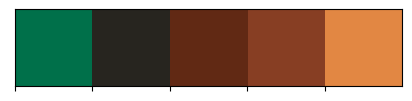

In [10]:
color_list = ["#00704A", "#27251F", "#612914", "#873E23", "#E28743"]
cmap = set_color_map(color_list)

## Univariate analysis

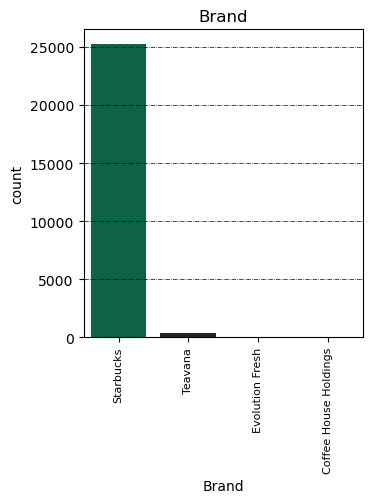

In [11]:
plot_count(coffee_df, "Brand", title="Brand",
          color_list=color_list, size=1.2)

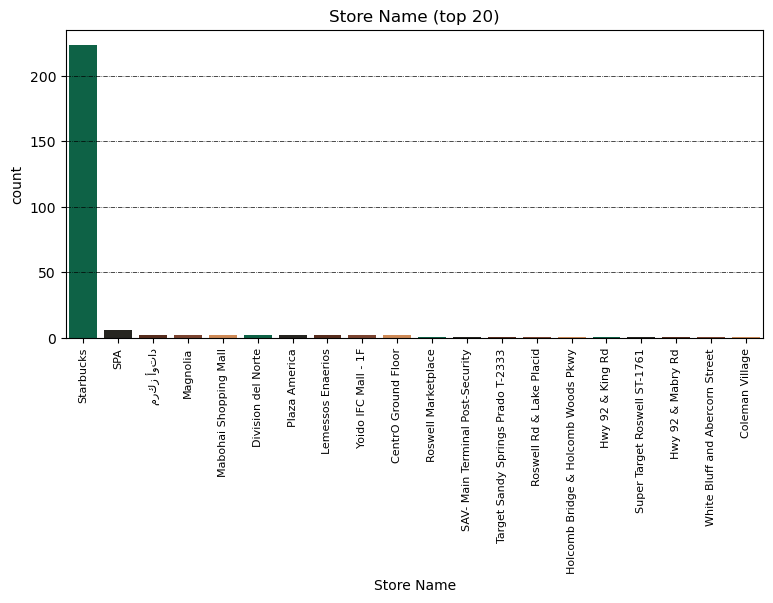

In [12]:
plot_count(coffee_df, "Store Name", title="Store Name (top 20)",
          color_list=color_list)

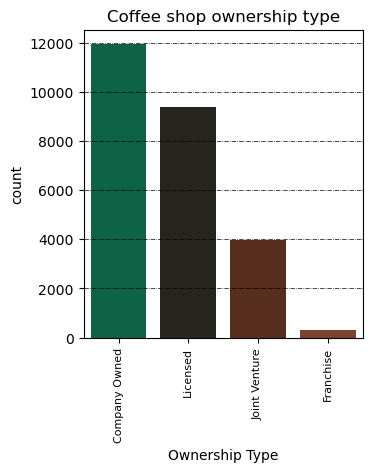

In [13]:
plot_count(coffee_df, "Ownership Type", title="Coffee shop ownership type",
          color_list=color_list, size=1.2)

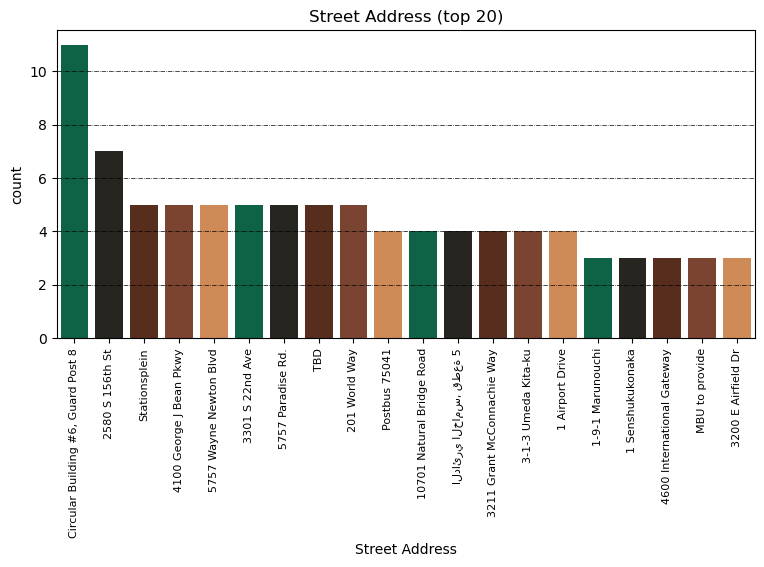

In [14]:
plot_count(coffee_df, "Street Address", title="Street Address (top 20)",
          color_list=color_list)

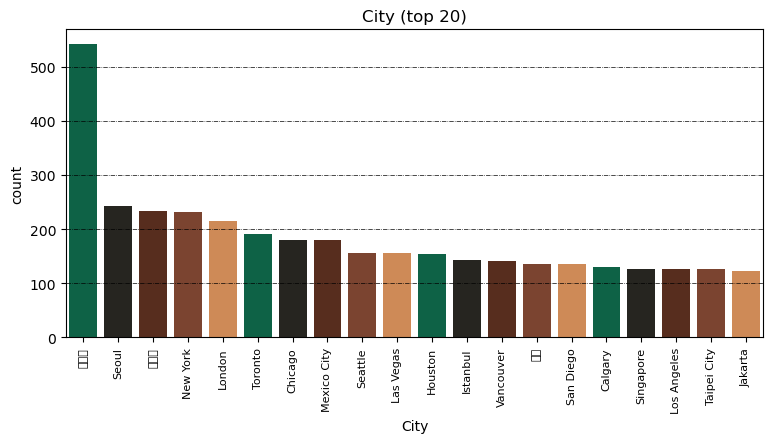

In [15]:
import warnings
warnings._setoption("ignore")
plot_count(coffee_df, "City", title="City (top 20)",
          color_list=color_list)


Some cities have the name written in characters that are neither ASCII or UTF-8. These are:  
* 上海市 - Shanghai shi - the city of Shanghai, i.e. Shanghai   
* 北京市 - Beijing shi - the city of Beijing, i.e. Beijing
* 서울 - Seoul  

Let's make sure that we represent the stats for those correctly.

In [16]:
coffee_df.loc[coffee_df.City.isin(["上海市", "shanghai"]), "City"] = "Shanghai"
coffee_df.loc[coffee_df.City.isin(["北京市", "beijing"]), "City"] = "Beijing"
coffee_df.loc[coffee_df.City.isin(["서울", "seoul"]), "City"] = "Seoul"

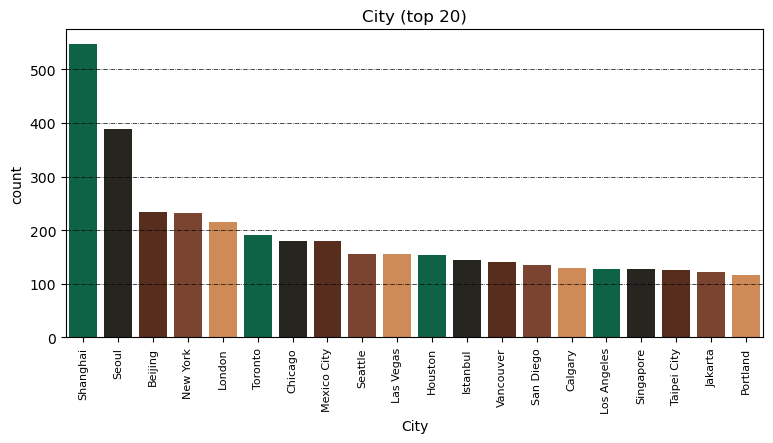

In [17]:
plot_count(coffee_df, "City", title="City (top 20)", 
           color_list=color_list)

Note: there are most probably more cities that are marked with different names. For now, we restrict our analysis to this.

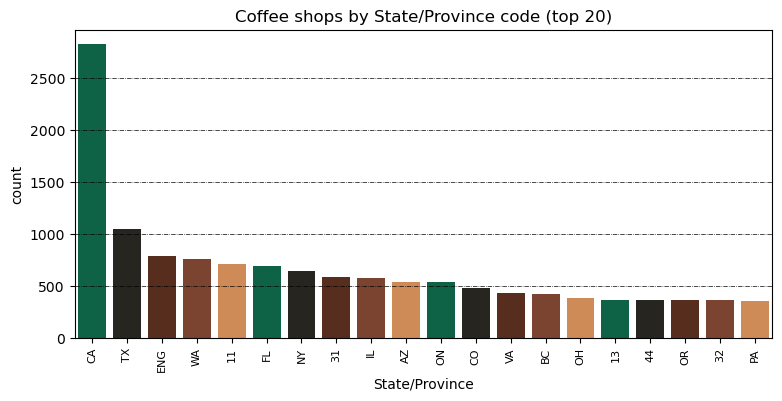

In [18]:
plot_count(coffee_df, "State/Province", title="Coffee shops by State/Province code (top 20)",
          color_list=color_list)

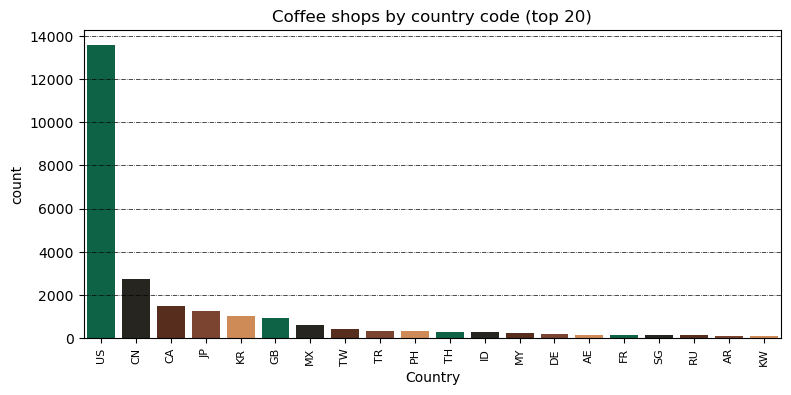

In [19]:
plot_count(coffee_df, "Country", title="Coffee shops by country code (top 20)",
          color_list=color_list)

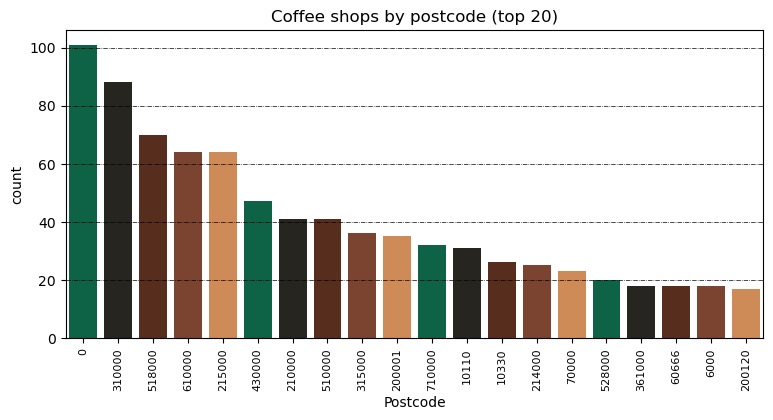

In [20]:
plot_count(coffee_df, "Postcode", title="Coffee shops by postcode (top 20)",
          color_list=color_list)

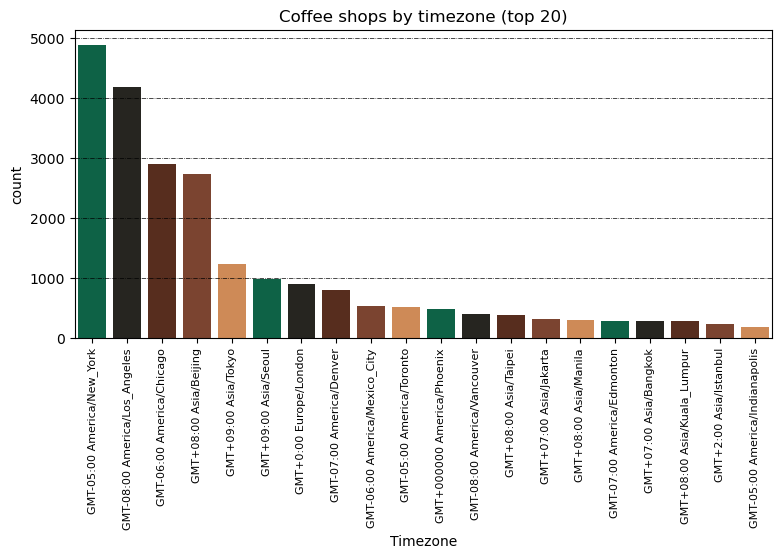

In [21]:
plot_count(coffee_df, "Timezone", title="Coffee shops by timezone (top 20)",
          color_list=color_list)

## Bivariate analysis


Let's look first to the coffee shops ownership type by countries.

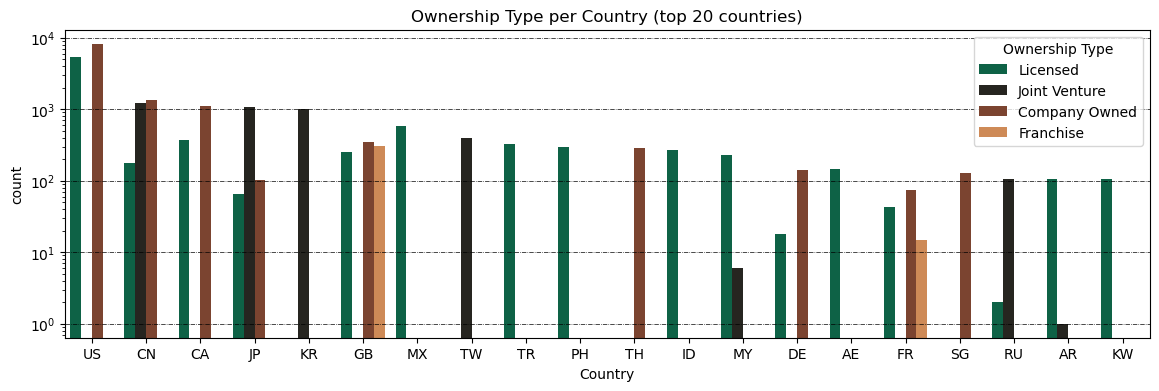

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 1, figsize=(14, 4))
sns.countplot(x="Country", data=coffee_df, 
              order = coffee_df["Country"].value_counts().index[0:20],
              palette= [color_list[i] for i in [0,1, 3, 4]], 
              hue="Ownership Type")
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
plt.yscale("log")
ax.set_title("Ownership Type per Country (top 20 countries)")
plt.show()

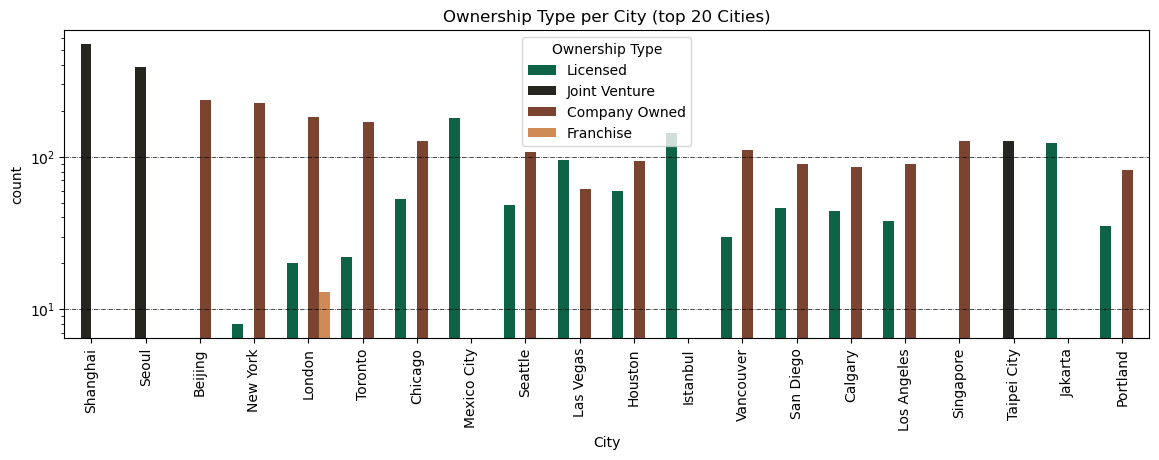

In [23]:
f, ax = plt.subplots(1, 1, figsize=(14, 4))
sns.countplot(x="City", data=coffee_df, 
              order = coffee_df["City"].value_counts().index[0:20],
              palette= [color_list[i] for i in [0,1, 3, 4]], 
              hue="Ownership Type")
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
plt.yscale("log")
ax.tick_params(axis='x', rotation=90)
ax.set_title("Ownership Type per City (top 20 Cities)")
plt.show()

## Geospatial analysis

We would like to look to the geographical distribution for the Starbucks shops. We start with leaflet plugins implemented in folio library.

In [24]:
import folium
from folium.plugins import MarkerCluster

In [25]:
coffee_df = coffee_df.loc[(~coffee_df.Latitude.isna()) & (~coffee_df.Longitude.isna())]
locations_data = np.array(coffee_df[["Latitude", "Longitude"]])
popups = coffee_df.apply(lambda row: f"Name: {row['Store Name']}", axis=1)
marker_cluster = MarkerCluster(
    locations = locations_data,
)
world_coords = [0., 0.]
world_map = folium.Map(location = world_coords, zoom_start = 1)
marker_cluster.add_to(world_map) 
world_map

Another way to represent the Starbucks coffee shops geospatial distribution is using geopandas plot function.

We aggregate coffee shops on countries.

In [26]:
coffee_agg_df = coffee_df.groupby(["Country"])["Brand"].count().reset_index()
coffee_agg_df.columns = ["Country", "Shops"]

With geopandas we will need `OSO3` country codes (country codes with 3 letters), we have only `ISO2` (country codes with 2 letters). We can include a dataset that contains the equivalences or we can import a Python package that will do the conversions for us. We opt for the second solution.

In [27]:
!pip install country-converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 286.3 kB/s eta 0:00:00


We perform the conversion from `ISO2` to `ISO3`.  
Then we read the polygon data with countries contours from geopandas.  
After this, we merge the world countries polygons data with the dataset with coffee shops number per country.  
Now we can visualize the countries with the color proportional with the number of shops in the country.

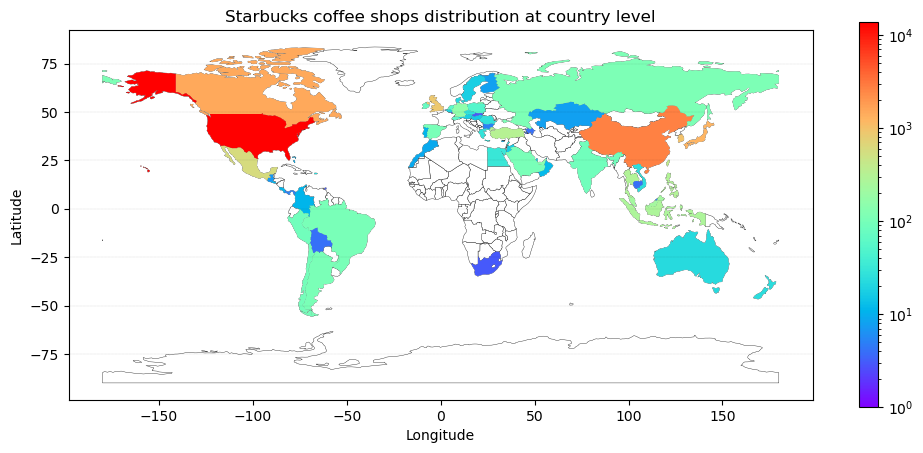

In [28]:
import geopandas as gpd
import matplotlib
import country_converter as cc

# convert ISO2 to ISO3 country codes - to be used with geopandas plot of countries
coffee_agg_df["iso_a3"] = coffee_agg_df["Country"].apply(lambda x: cc.convert(x, to='ISO3'))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_shop = world.merge(coffee_agg_df, on="iso_a3", how="right")
world_shop.loc[world_shop.Shops.isna(), "Shops"] = 0
f, ax = plt.subplots(1, 1, figsize=(12, 5))
# show all countries contour with black and color while
world.plot(column=None, color="white", edgecolor='black', linewidth=0.25, ax=ax) 
# draw countries polygons with log scale colormap
world_shop.plot(column='Shops', legend=True,\
           norm=matplotlib.colors.LogNorm(vmin=world_shop.Shops.min(),\
                                          vmax=world_shop.Shops.max()), 
           cmap="rainbow",
           ax=ax)
plt.grid(color="black", linestyle=":", linewidth=0.1, axis="y", which="major")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.title("Starbucks coffee shops distribution at country level")
plt.show()

Calculate area of each country. Note: this is an approximation of the real area, calculated based on 

In [29]:
world_cp = world.copy()
# transform, in the copied data, the projection in Cylindrical equal-area,
# which preserves the areas 
world_cp= world_cp.to_crs({'proj':'cea'})
world_cp["area"] = world_cp['geometry'].area / 10**6 # km^2
world["area"] = world_cp["area"]

Note: we tried, for calculation of area of countries, with alternative methods recommended by various articles, but only the above one yielded correct areas.

Let's check the resulted area for few countries for which we know the area.

In [30]:
world.loc[world.iso_a3.isin(["GBR", "USA", "ROU"])]

pop_est      continent                      name iso_a3  gdp_md_est  \
4    326625791  North America  United States of America    USA  18560000.0   
117   21529967         Europe                   Romania    ROU    441000.0   
143   64769452         Europe            United Kingdom    GBR   2788000.0   

                                              geometry          area  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  9.509851e+06  
117  POLYGON ((28.23355 45.48828, 28.67978 45.30403...  2.383786e+05  
143  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...  2.499296e+05

The calculated areas are according to the known values for these countries.

We merge the data with the shop data, using `iso_a3` as merge factor.  
We calculate then:
* The number of shops / 1 million population
* The number of shops / 1000 square kilometers

In [31]:
world_shop = world.merge(coffee_agg_df, on="iso_a3", how="right")
world_shop["Shops / Population"] = world_shop["Shops"] / world_shop["pop_est"] * 10**6  # shops/1 million population
world_shop["Shops / Area"] = world_shop["Shops"] / world_shop["area"] * 10**3. # shops / 1000 Km^2

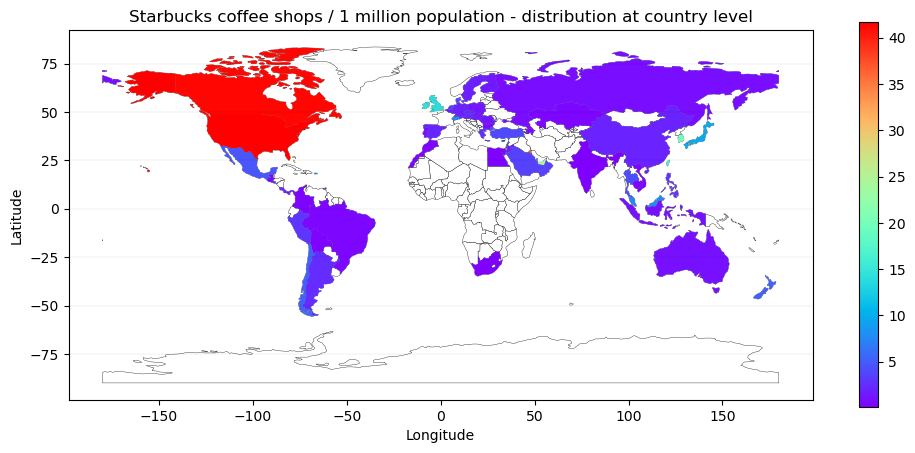

In [32]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
# show all countries contour with black and color while
world.plot(column=None, color="white", edgecolor='black', linewidth=0.25, ax=ax) 
# draw countries polygons
world_shop.plot(column='Shops / Population', legend=True,\
           cmap="rainbow",
           ax=ax)
plt.grid(color="black", linestyle=":", linewidth=0.1, axis="y", which="major")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.title("Starbucks coffee shops / 1 million population - distribution at country level")
plt.show()

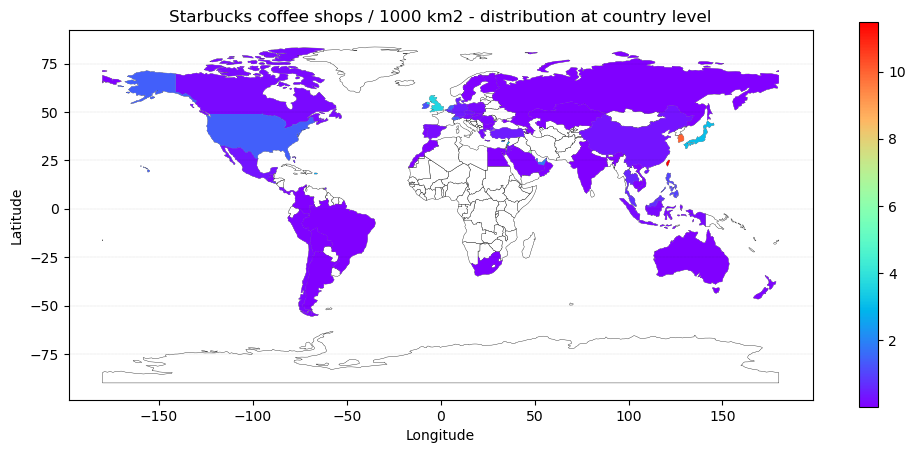

In [33]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
# show all countries contour with black and color while
world.plot(column=None, color="white", edgecolor='black', linewidth=0.25, ax=ax) 
# draw countries polygons with log scale colormap
world_shop.plot(column='Shops / Area', legend=True,\
           cmap="rainbow",
           ax=ax)
plt.grid(color="black", linestyle=":", linewidth=0.1, axis="y", which="major")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Starbucks coffee shops / 1000 km2 - distribution at country level")
plt.show()